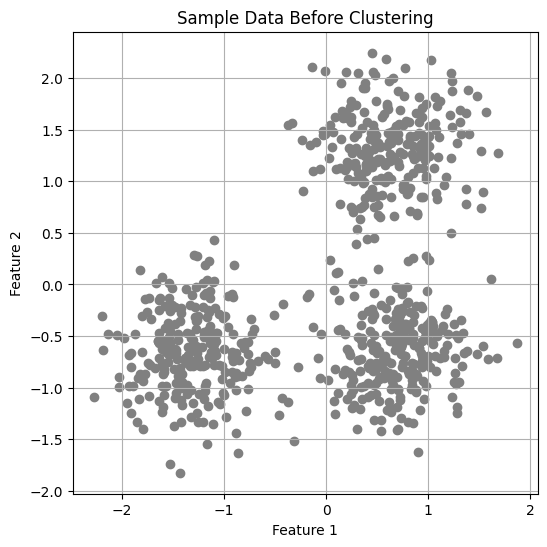

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

#  Generate sample data
centers = [[1,1], [-1,-1], [1,-1]]
# random_state=0 is not random, if random_state = 1,2,3,4,5 or something , it will get random result
X, _ = make_blobs(n_samples= 750, centers= centers, cluster_std=0.4,random_state= 0)
X = StandardScaler().fit_transform(X)

# Plotting before clustering
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:,1] , color='gray' , marker = 'o')
plt.title('Sample Data Before Clustering')
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

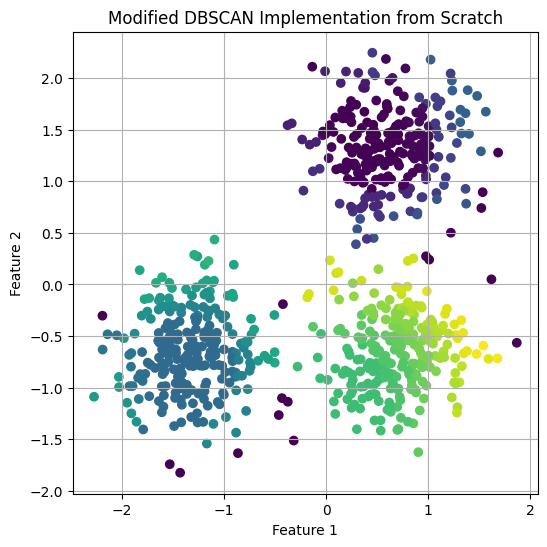

In [10]:
def scratch_dbscan(data, eps, min_samples):
  n_points= len(data)
  labels = np.full(n_points, -1)
  core_points = np.zeros(n_points, dtype=bool)

  #step1 : find all core points
  for i in range(n_points):
    distances = np.linalg.norm(data - data[i], axis=1)
    neighbor_points = np.where(distances <= eps)[0]
    if len(neighbor_points) >= min_samples:
      core_points[i] = True

  #step2 : Cluster core points
  cluster_id = 0
  visited = np.zeros(n_points, dtype=bool)
  for i in range(n_points):
    if core_points[i] and not visited[i]:
      labels[i]= cluster_id
      visited[i] = True
      queue = [i]
      while queue:
        current_point = queue.pop(0)
        distances = np.linalg.norm(data - data[current_point], axis=1)
        neighbors = np.where(distances<=eps)[0]
        for neighbor in neighbors:
            if core_points[neighbor] and not visited[neighbor]:
              labels[neighbor] = cluster_id
              visited[neighbor] = True
              queue.append(neighbor)
        cluster_id +=1

  #step3 : Assign non-core points
  for i in range(n_points):
    if not core_points[i]:
      distances = np.linalg.norm(data - data[i], axis=1)
      neighbors = np.where(distances<=eps)[0]
      neighbors_clusters =set()
      for neighbor in neighbors:
        if core_points[neighbor]:
          label = labels[neighbor]
          neighbors_clusters.add(label)

      if neighbors_clusters:
        labels[i] = np.random.choice(list(neighbors_clusters))
      else:
        pass

  return labels

my_labels =scratch_dbscan(X, eps=0.3, min_samples=10)

# Plotting
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:,1] , c=my_labels, cmap='viridis', marker = 'o')
plt.title('Modified DBSCAN Implementation from Scratch')
plt.grid(True)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()